In [3]:
import pandas as pd
import numpy as np
import seaborn as s
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [4]:
#reading in the csv file as a dataframe
data=pd.read_csv("Life_Expectancy_Data.csv")
###replacing null cells with the means of that column

for col in data.columns:
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].mean())


data.isnull().sum()

Country                            0
Continent                          0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
 BMI                               0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [26]:
data.groupby('Country').count()

,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Albania,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Algeria,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Angola,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Antigua and Barbuda,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Uzbekistan,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Vanuatu,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16


In [20]:
data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jordan', 

In [52]:
morocco = data[data['Country'] == 'Morocco']

predictVar=morocco[['GDP','Schooling','Income_composition_of_resources']]
target=morocco['Life_expectancy ']

In [53]:
predictVar.head(8)

,GDP,Schooling,Income_composition_of_resources
1524,2847.285569,12.1,0.645
1525,3154.513484,12.1,0.640
1526,3111.762887,12.1,0.634
1527,294.746728,11.6,0.623
1528,339.916160,11.2,0.612
1529,2834.247200,10.7,0.603
1530,2861.554500,10.5,0.596
1531,2884.947760,10.3,0.589


<Axes: xlabel='GDP', ylabel='Life_expectancy '>

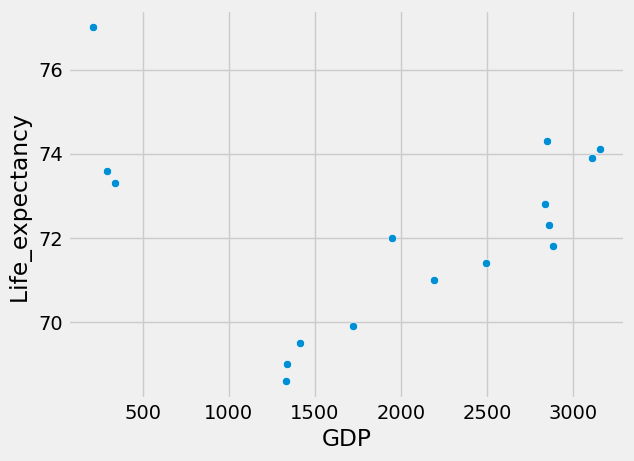

In [35]:
s.scatterplot(data=morocco,x='GDP',y='Life_expectancy ')


<Axes: xlabel='Income_composition_of_resources', ylabel='Life_expectancy '>

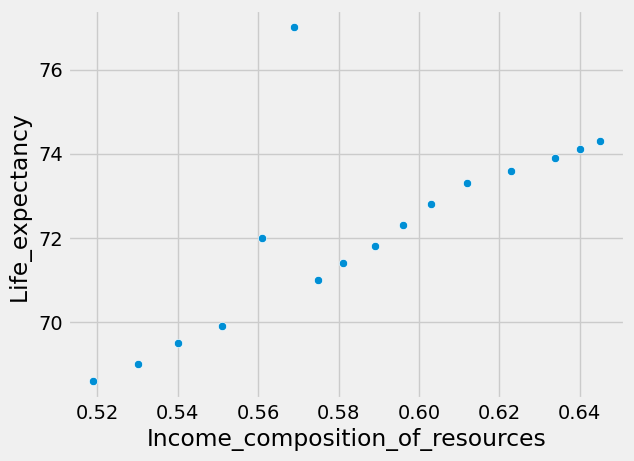

In [36]:
s.scatterplot(data=morocco,x='Income_composition_of_resources',y='Life_expectancy ')


<Axes: xlabel='Schooling', ylabel='Life_expectancy '>

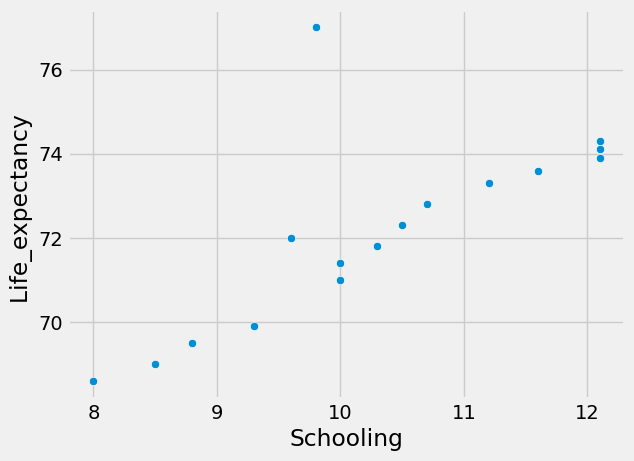

In [37]:
s.scatterplot(data=morocco,x='Schooling',y='Life_expectancy ')


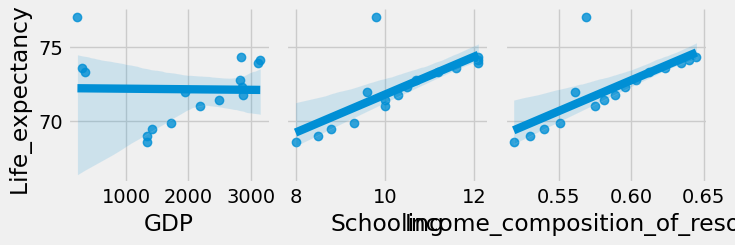

In [43]:
s.pairplot(morocco,x_vars=predictVar,y_vars='Life_expectancy ',kind='reg')

In [5]:
# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [46]:
X = data.drop(["Life_expectancy "],axis=1)
y = data["Life_expectancy "]
#X = pd.get_dummies(X, dummy_na=True)

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#using the oneHotEncoder to transform the categorical columns
categorical_features = ['Country', 'Status','Continent','Diphtheria ','Population' ]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  
)
X_encoded = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(predictVar, target, test_size=0.2, random_state=42)

#establishes linear regression 
lr=LinearRegression()
#fits the model onto training set
lr.fit(X_train,y_train)
prediction=lr.predict(X_test)
#checks to see models efficenecy 
RMSE=(str(mean_squared_error( prediction , y_test, squared=False )))
R2_score=(str(r2_score( y_test , prediction ) * 100 ) + " %")

In [48]:
print("Model Efficenecy")
print("RMSE:",RMSE)
print("r2:",R2_score)
print("Intercept: ",lr.intercept_)
print("Coefficent: ",lr.coef_)
print(list(zip(predictVar, lr.coef_)))

Model Efficenecy
RMSE: 0.82194832623
r2: 85.0943397465 %
Intercept:  58.6434263205
Coefficent:  [ -7.87883564e-04   1.16447122e+00   5.15689058e+00]
[('GDP', -0.00078788356391796069), ('Schooling', 1.1644712166367723), ('Income_composition_of_resources', 5.1568905812040358)]


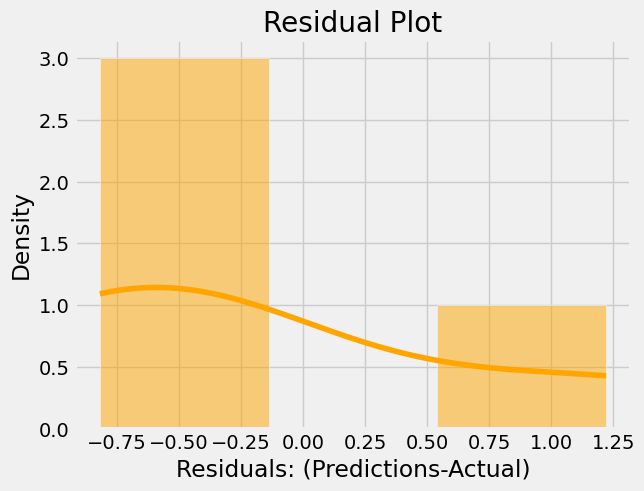

1524   -0.483607
1525   -0.551451
1529   -0.820183
1538    1.221360
Name: Life_expectancy , dtype: float64

In [51]:
predictions=lr.predict(X_test)
residuals=(predictions-y_test)
s.histplot(residuals, kde=True,color="orange")
plt.title('Residual Plot')
plt.xlabel('Residuals: (Predictions-Actual)')
plt.ylabel('Density')
plt.show()
residuals.head(20)

In [1]:
#Y=58.64-.00078(GDP)+1.16(Schooling)+5.16(ICOR)

